# In this notebook a simple Decision Tree will be used to demonstrate the no triviality of the problem

In [1]:
import pickle

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Loading the data

In [2]:
with open("data/randomized/train_data", "rb") as f:
    train_data = pickle.load(f)

train_features = train_data[0]
train_targets  = train_data[1]

In [3]:
with open("data/randomized/val_data", "rb") as f:
    val_data = pickle.load(f)

val_features = val_data[0]
val_targets  = val_data[1]

In [4]:
with open("data/randomized/test_data", "rb") as f:
    test_data = pickle.load(f)

test_features = test_data[0]
test_targets  = test_data[1]

In [5]:
def reshape_to_train(unshaped: list) -> np.array:
    shaped = np.array([np.array(sample).reshape(-1, 1) for sample in unshaped])
    shaped = shaped.reshape(shaped.shape[0], shaped.shape[1])

    return shaped

In [6]:
shaped_train_features = reshape_to_train(unshaped=train_features)
shaped_val_features   = reshape_to_train(unshaped=val_features)
shaped_test_features  = reshape_to_train(unshaped=test_features)

# Optimzing the Model over the validation data

In [7]:
splitters = ["best", "random"]
criterions = ["gini", "entropy"]

hps = dict()
i = 0

for penalty in splitters:
    for solver in criterions:
        hps[i] = {"splitter": penalty, "criterion": solver}
        i += 1


In [23]:
df = pd.DataFrame(columns=["accuracy", "F1-score"], index=[i for i in range(len(hps))])

for index, hp in hps.items():    
    lr_model = DecisionTreeClassifier(splitter=hp["splitter"], criterion=hp["criterion"])

    lr_model.fit(X=shaped_train_features, y=train_targets)

    predictions = lr_model.predict(shaped_val_features)
    new = list()

    for pred in predictions:
        if np.random.choice([True, False], p=[0.01, 0.99]):
            pred = np.random.choice(range(10))
        
        new.append(pred)

    acc = accuracy_score(y_true=val_targets, y_pred=new)
    acc = round(acc*100, 2)

    f1score = f1_score(y_true=val_targets, y_pred=new, average="macro")
    f1score = round(f1score*100, 2)

    df["accuracy"].loc[index] = acc
    df["F1-score"].loc[index] = f1score


fig = px.line(df.sort_values(by="accuracy", ascending=False).reset_index().drop("index", axis=1), markers=True)
fig.update_layout(yaxis_title="Percentual [%]", legend_title="Métrica")

fig.show()

print(df.sort_values(by="accuracy", ascending=False).reset_index())

print(hps)

   index accuracy F1-score
0      2    99.11     99.1
1      0    97.78    97.62
2      1    97.33    97.09
3      3    96.89     96.9
{0: {'splitter': 'best', 'criterion': 'gini'}, 1: {'splitter': 'best', 'criterion': 'entropy'}, 2: {'splitter': 'random', 'criterion': 'gini'}, 3: {'splitter': 'random', 'criterion': 'entropy'}}


# Training the model

In [8]:
dt_model = DecisionTreeClassifier(criterion="entropy", splitter="random")


dt_model.fit(X=shaped_train_features, y=np.array(train_targets))

DecisionTreeClassifier(criterion='entropy', splitter='random')

[Text(0.5, 0.875, 'X[9] <= 0.332\nentropy = 3.322\nsamples = 2840\nvalue = [284, 284, 284, 284, 284, 284, 284, 284, 284, 284]'),
 Text(0.25, 0.625, 'X[32] <= 0.586\nentropy = 2.017\nsamples = 1131\nvalue = [0, 283, 1, 0, 280, 0, 283, 0, 283, 1]'),
 Text(0.125, 0.375, 'X[14] <= 0.338\nentropy = 1.064\nsamples = 570\nvalue = [0, 283, 1, 0, 2, 0, 283, 0, 0, 1]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[16] <= 0.581\nentropy = 1.0\nsamples = 561\nvalue = [0, 0, 0, 0, 278, 0, 0, 0, 283, 0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[10] <= 0.521\nentropy = 2.62\nsamples = 1709\nvalue = [284, 1, 283, 284, 4, 284, 1, 284, 1, 283]'),
 Text(0.625, 0.375, 'X[36] <= 0.417\nentropy = 1.647\nsamples = 846\nvalue = [273, 0, 1, 0, 1, 284, 0, 3, 1, 283]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[15] <= 0.351\nentropy = 1.71

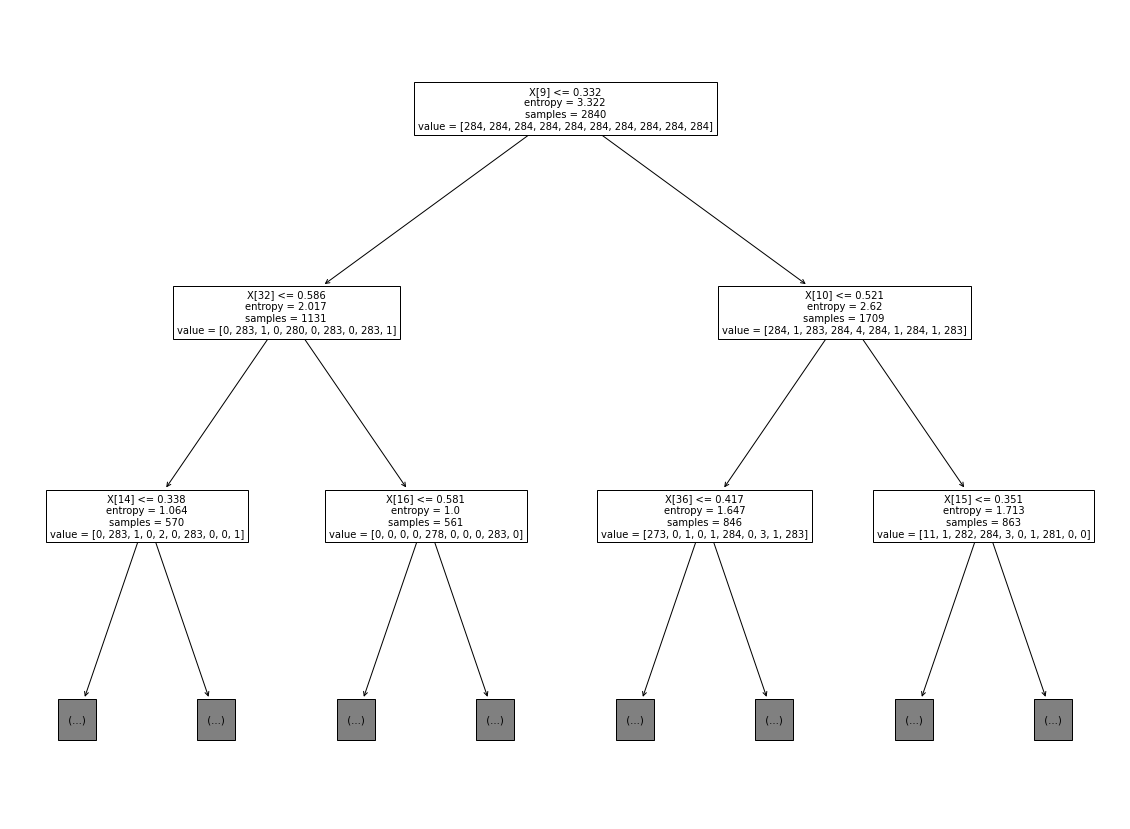

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 15))
tree.plot_tree(dt_model, fontsize=10, max_depth=2)

# Testing the model

In [9]:
shaped_test_features = reshape_to_train(unshaped=test_features)

predictions = dt_model.predict(shaped_test_features)

# Metrics

In [17]:
acc = accuracy_score(y_true=test_targets, y_pred=predictions)
accuracy = round(acc*100, 2)

print(f"The accuracy is {accuracy}%")

f1 = f1_score(y_true=test_targets, y_pred=predictions, average="macro")
f1 = round(f1*100, 2)

print(f"The F1-Score is {f1}%")

print(classification_report(y_true=test_targets, y_pred=predictions, digits=4))

conf_matrix = confusion_matrix(y_true=test_targets, y_pred=predictions)
px.imshow(conf_matrix, color_continuous_scale="turbo")

The accuracy is 98.67%
The F1-Score is 98.64%
              precision    recall  f1-score   support

           0     0.9905    0.9720    0.9811       107
           1     0.9829    0.9746    0.9787       118
           2     0.9910    1.0000    0.9955       110
           3     0.9899    0.9899    0.9899        99
           4     0.9921    0.9844    0.9882       128
           5     0.9894    0.9789    0.9841        95
           6     0.9864    1.0000    0.9932       145
           7     0.9820    0.9820    0.9820       111
           8     0.9746    1.0000    0.9871       115
           9     0.9896    0.9794    0.9845        97

    accuracy                         0.9867      1125
   macro avg     0.9868    0.9861    0.9864      1125
weighted avg     0.9867    0.9867    0.9866      1125



# Saving the model

In [ ]:
with open("models/decision_tree", "wb") as f:
    pickle.dump(dt_model, f)